In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import sys
import numpy as np
import random

## 1. Geometric Mean
The function bellow computes the geometric mean of a vector 
$x = \{x_1, x_2, \dots, x_n\}$. 
If any of the values within the vector are negative, the function gives a
warning message and computes the geometric mean. To compute the geometric mean, the following equations is used:
$$
f(x) = \left( \prod_{i}^{n}x_{i} \right)^{\frac{1}{n}}
$$

The code is quite simple, firstly we evaluate if any value of the vector is negative. If that is the case a warning message is returned informing the problem. Secondly the built-in `numpy.prod` function is used to compute the product of all values. Finally, the obtained result is raised to the power of $\frac{1}{n}$. The code can be viewed bellow.

In [2]:
def GeometricMean(values):
    values = np.asarray(values)
    if(sum(values < 0) > 0):
        sys.stderr.write("Negative values found.\n")
        return np.nan
    return np.prod(values) ** (1/len(values))

Let's make a few test cases for the `GeometricMean` function. We are going to use as example three test cases obtained from the [MathIsFun](https://www.mathsisfun.com/numbers/geometric-mean.html) website. As can be verified, all outputs are correctly computed.

In [3]:
print (GeometricMean([2, 18]))
print (GeometricMean([10, 51.2, 8]))
print (GeometricMean([1, 3, 9, 27, 81]))

6.0
16.0
9.0


***

## 2. Building a new Dataset
Lets build a dataset using the random generation normal distribution with mean equal 3 and default standard deviation 1. To do that, it's necessary to simple use the `numpy.random.normal` function and append the obtained results into a dataframe. The code to that is as follows: 

In [4]:
np.random.seed(123)
col_names = ["X."+str(x) for x in range(1, 26, 1)]
data = pd.DataFrame(np.random.normal(loc=3, scale=1, size=(400, 25)), 
                    columns=col_names)

Now let`s take a look at how the newly created data frame looks like, to do that let's print the first 5 lines of the data.

In [5]:
data.head(5)

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,...,X.16,X.17,X.18,X.19,X.20,X.21,X.22,X.23,X.24,X.25
0,1.914369,3.997345,3.282978,1.493705,2.421400,4.651437,0.573321,2.571087,4.265936,2.133260,...,2.565649,5.205930,5.186786,4.004054,3.386186,3.737369,4.490732,2.064166,4.175829,1.746119
1,2.362248,3.907105,1.571319,2.859931,2.138245,2.744381,0.201411,1.228467,2.300123,3.927462,...,2.194633,1.272331,2.609100,3.573806,3.338589,2.988170,5.392365,3.412912,3.978736,5.238143
2,1.705915,1.961212,4.743712,2.201937,3.029683,4.069316,3.890706,4.754886,4.495644,4.069393,...,3.807237,3.045490,2.766908,1.801699,3.199524,3.468439,2.168845,4.162204,1.902797,0.876900
3,4.039727,2.596634,2.873970,2.162483,1.394037,4.255237,2.311131,4.660952,3.807308,2.685242,...,4.150206,1.732648,3.181035,4.177862,2.664989,4.031114,1.915432,1.636528,3.379401,2.620824
4,3.642055,1.022112,3.712265,5.598304,2.975374,3.034142,3.179549,1.138024,3.426147,1.394590,...,3.278741,1.629052,2.667525,4.959411,0.974954,2.724214,2.447892,3.120747,3.748216,4.608691


### 2.1 Geometric Mean for all Columns
Let's use the function `GeometricMean` created on topic 1 to compute the geometric mean for each column of the data frame.  As we can observe, a few outputs are warning messages, since there are negative values in a few of the columns.

In [6]:
print(data.apply(GeometricMean, 0))

X.1     2.859298
X.2     2.878302
X.3     2.799228
X.4     2.844923
X.5          NaN
X.6     2.763314
X.7          NaN
X.8     2.728449
X.9          NaN
X.10    2.824332
X.11    2.791317
X.12    2.815307
X.13    2.935360
X.14         NaN
X.15    2.852179
X.16         NaN
X.17         NaN
X.18         NaN
X.19    2.789341
X.20         NaN
X.21         NaN
X.22    2.781710
X.23    2.684876
X.24    2.798937
X.25    2.837613
dtype: float64


Negative values found.
Negative values found.
Negative values found.
Negative values found.
Negative values found.
Negative values found.
Negative values found.
Negative values found.
Negative values found.


### 2.2 Standard Deviation
Lets compute the standard deviation for each column in the dataset. Python already has a built-in function in the numpy package named `numpy.std` that computes the standard deviation. The code is shown bellow:

In [7]:
np.std(data)

X.1     1.013371
X.2     0.974817
X.3     1.002213
X.4     0.996132
X.5     1.004125
X.6     0.944412
X.7     1.026420
X.8     0.972876
X.9     1.014634
X.10    0.967130
X.11    0.983648
X.12    0.981615
X.13    1.025557
X.14    0.987422
X.15    0.973961
X.16    0.993375
X.17    1.032901
X.18    1.038163
X.19    1.003877
X.20    0.993721
X.21    0.993081
X.22    1.014684
X.23    0.959315
X.24    1.000458
X.25    1.015611
dtype: float64

As we can observe above, each value is the standard deviation for a given column in the range [1, 25]. Therefore the standard deviation for the first column is 1.013371, for the second is 0.974817 and the column 25 has a standard deviation of 1.015611.

### 2.3 Total
Now let's compute the total sum for each column. Just like the previous question, we are going to use the summation function `numpy.sum` to compute the total for all columns of the data frame.

In [8]:
total_columns = data.apply(np.sum, 0)
total_columns

X.1     1229.040077
X.2     1221.787716
X.3     1192.746416
X.4     1216.835401
X.5     1179.284432
X.6     1181.758721
X.7     1235.032475
X.8     1165.819671
X.9     1211.593981
X.10    1202.633841
X.11    1198.968122
X.12    1199.474502
X.13    1251.835058
X.14    1196.941481
X.15    1223.683642
X.16    1212.672739
X.17    1213.007831
X.18    1190.539002
X.19    1197.258357
X.20    1194.513415
X.21    1216.959790
X.22    1196.933337
X.23    1159.560910
X.24    1194.877928
X.25    1213.360077
dtype: float64

Just like for the standard deviation, the first value is the total for the first column, the second for the second column and so-on. 

The sum for the lines are just alike, where the first value is the sum for the first line, the second value for the second line, and so-on. The code is shown bellow:

In [9]:
total_lines = data.apply(np.sum, 1)
total_lines

0      78.502570
1      72.161002
2      77.549906
3      74.497429
4      75.875966
5      80.082226
6      71.930953
7      70.157299
8      76.424430
9      67.664204
10     78.944770
11     67.453465
12     75.416890
13     72.577604
14     67.345865
15     71.300431
16     69.657190
17     79.953935
18     81.288905
19     71.892972
20     73.919667
21     76.544663
22     80.781660
23     79.575798
24     80.133095
25     69.173164
26     75.946619
27     78.199859
28     77.576588
29     81.893356
         ...    
370    74.924790
371    81.223198
372    68.693679
373    76.610589
374    76.667825
375    71.841294
376    77.630795
377    71.359032
378    74.089372
379    71.617209
380    70.567474
381    76.646767
382    68.738134
383    77.080861
384    71.117105
385    72.201667
386    73.601835
387    81.664420
388    72.019723
389    76.460088
390    71.139135
391    69.965292
392    82.970538
393    84.371197
394    73.723995
395    76.507819
396    71.472684
397    70.9813

### 2.4 Conditional Selection
Now let's select a subset of the original data, considering  the restriction that the values for the column $X.1 > 3$ and the values for the column $X.20 < 3$.


In [10]:
sub = data.ix[(data['X.1'] > 3) & (data['X.20'] < 3)]
print(sub.shape) # return the dimension of the data frame (lines, columns)

(115, 25)


As it's possible to see, both approaches indicates that after meeting the condition, only 115 lines of the data are left.

### 2.5 Replacing Column Names
Let's take a look of how the column names looks like:

In [11]:
data.columns

Index(['X.1', 'X.2', 'X.3', 'X.4', 'X.5', 'X.6', 'X.7', 'X.8', 'X.9', 'X.10',
       'X.11', 'X.12', 'X.13', 'X.14', 'X.15', 'X.16', 'X.17', 'X.18', 'X.19',
       'X.20', 'X.21', 'X.22', 'X.23', 'X.24', 'X.25'],
      dtype='object')

To modify the column names, it's necessary to replace the current variables by assigning the new names to the `columns` attribute. The fragment of code that performs this operation is quite simple, and can be seen bellow: 

In [12]:
new_col_names = ["Var"+str(x) for x in range(1,26, 1)]
data.columns = new_col_names
data.head(5)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25
0,1.914369,3.997345,3.282978,1.493705,2.421400,4.651437,0.573321,2.571087,4.265936,2.133260,...,2.565649,5.205930,5.186786,4.004054,3.386186,3.737369,4.490732,2.064166,4.175829,1.746119
1,2.362248,3.907105,1.571319,2.859931,2.138245,2.744381,0.201411,1.228467,2.300123,3.927462,...,2.194633,1.272331,2.609100,3.573806,3.338589,2.988170,5.392365,3.412912,3.978736,5.238143
2,1.705915,1.961212,4.743712,2.201937,3.029683,4.069316,3.890706,4.754886,4.495644,4.069393,...,3.807237,3.045490,2.766908,1.801699,3.199524,3.468439,2.168845,4.162204,1.902797,0.876900
3,4.039727,2.596634,2.873970,2.162483,1.394037,4.255237,2.311131,4.660952,3.807308,2.685242,...,4.150206,1.732648,3.181035,4.177862,2.664989,4.031114,1.915432,1.636528,3.379401,2.620824
4,3.642055,1.022112,3.712265,5.598304,2.975374,3.034142,3.179549,1.138024,3.426147,1.394590,...,3.278741,1.629052,2.667525,4.959411,0.974954,2.724214,2.447892,3.120747,3.748216,4.608691


As it's possible to see in the head for the dataset, all column names were modified for the $Var1, Var2, \dots, Var25$.

***

## 3. Iris Data Set
Reading the data set Iris and verifying the first 5 lines.

In [13]:
iris = pd.read_csv('./iris.csv')
iris.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 3.1 Obtaining help
The documentation help can also be used to look up the format of the data. This can be done by using either `?` or the `help` function.

In [14]:
?iris

### 3.2 Boxplot
It's possible to plot a box-and-whisker plot by calling the `boxplot` function in the library. If a dataframe consistis only of numerical values, it plots all variables in a single plot. Since our species is categorial, we are going to replace the categorical values by using a dictionary with the numerical values. The code is shown bellow:

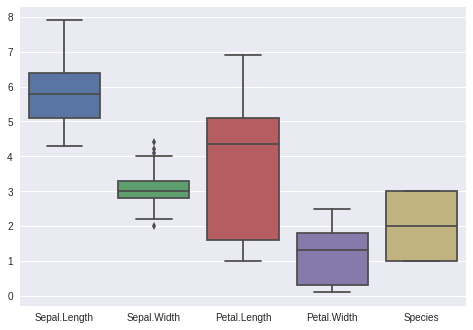

In [15]:
to_plot = iris.replace({"Species":{"setosa":1, "versicolor":2, "virginica":3}})
sb.boxplot(data=to_plot)

### 3.3 BoxPlot in Groups
To plot multiple charts in the same frame we can split the window using the matplotlib function `matplotlib.pyplot.subplots`. The aggregation of groups can be done by simples passing the dataframe columns.
The plot bellow shows this operation for each attribute of the iris dataset grouped by the attribute Species.

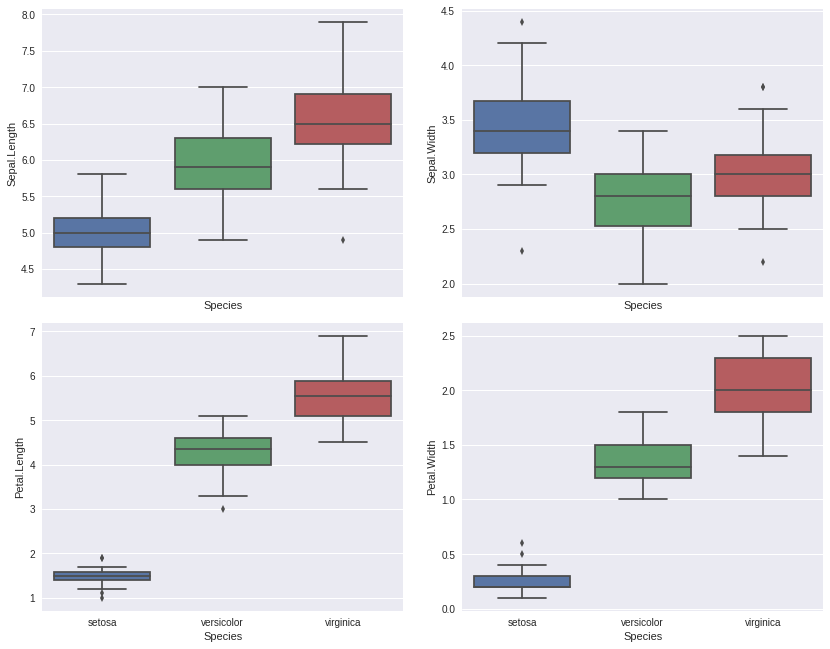

In [16]:
fig, axis = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.tight_layout(w_pad=5)
sb.boxplot(iris["Species"], iris["Sepal.Length"], ax=axis[0][0])
sb.boxplot(iris["Species"], iris["Sepal.Width"], ax=axis[0][1])
sb.boxplot(iris["Species"], iris["Petal.Length"], ax=axis[1][0])
sb.boxplot(iris["Species"], iris["Petal.Width"], ax=axis[1][1])
fig.tight_layout(pad = -10, h_pad = 1 , w_pad=2)

### 3.4 Histogram
To compute the histogram, seaborn provides the function `seaborn.distplot`. The following chart shows the histogram for each column of the data set iris.

/home/clebson/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


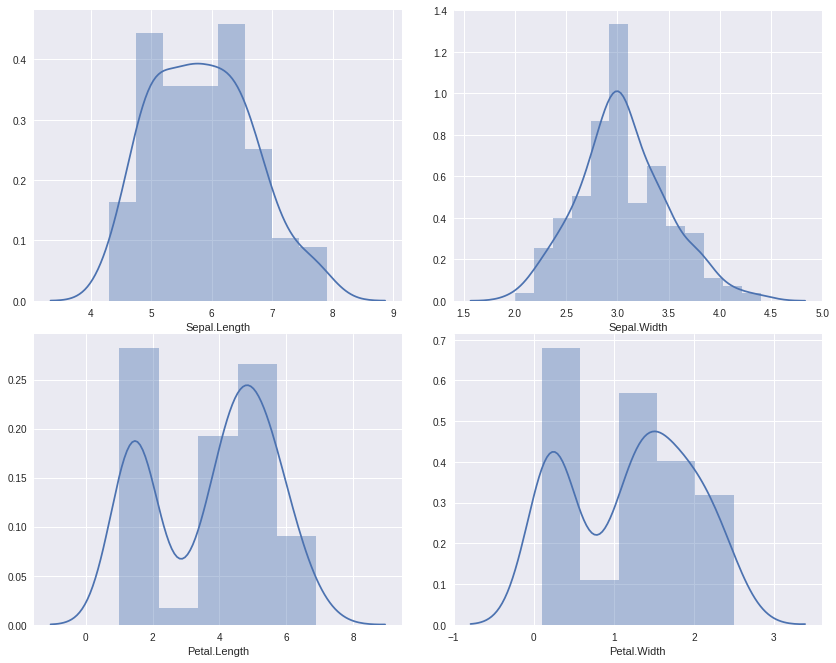

In [17]:
fig, axis = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad = -10, h_pad = 1 , w_pad=2)
sb.distplot(iris["Sepal.Length"], ax=axis[0][0])
sb.distplot(iris["Sepal.Width"], ax=axis[0][1])
sb.distplot(iris["Petal.Length"], ax=axis[1][0])
sb.distplot(iris["Petal.Width"], ax=axis[1][1])

***

## 4 Attitude Dataset
Let's read the data set attitude and check-out the 5 first lines of the data.

In [18]:
attitude = pd.read_csv('./attitude.csv')
attitude.head(5)

,rating,complaints,privileges,learning,raises,critical,advance
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


### 4.1 Discovering the dataset
To visualize the dataset information we can check the python help function with `?` or `help` in the same way we did for the Iris collection.

In [19]:
?attitude

### 4.2 Plotting the Data
To plot a scatter plot of all attributes against all atributes we can call the `seaborn.pairplot` function. In doing so, a $N \times N$ matrix of all atributes is ploted. The result of this plot can ve visualized bellow:

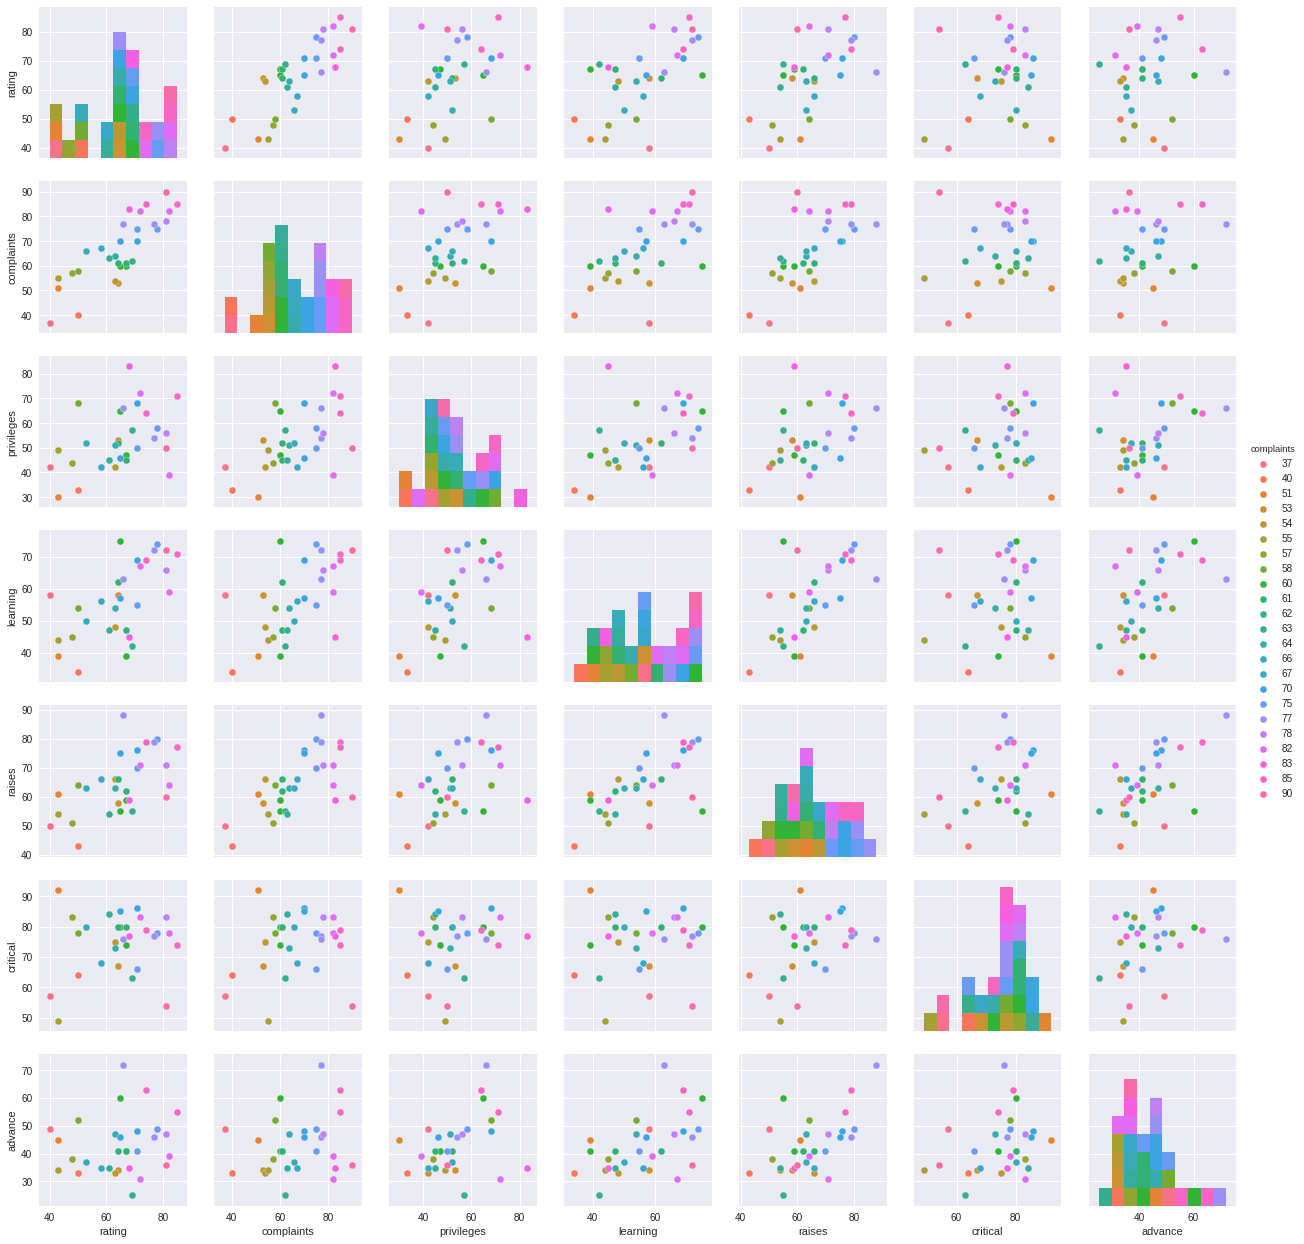

In [20]:
sb.pairplot(attitude, hue="complaints")

### 4.3 Computing the Mean
There are basically two ways of computing the mean of columns. One was already explained in exercises 2.2 (Standard Deviation) and 2.3 (Total Sum), which basically consists of looping through each column and then applying the function to be computed upon the rows. The code for this approach is shown bellow:

In [21]:
attitude.mean()

rating        64.633333
complaints    66.600000
privileges    53.133333
learning      56.366667
raises        64.633333
critical      74.766667
advance       42.933333
dtype: float64

### 4.4 Transforming a variable
It's possible to easily transform the values of a column to discrete values with `apply` and `lambda` expressions. To update the dataframe, the only thing required is to make an assignment of the discrete values into the desired column of the dataframe. The code bellow shows how this procedure is done. The first 5 lines of the dataset is shown, and as we can observe, the column `attitude['complaints']` is now categoric.

In [22]:
attitude['complaints'] = attitude.complaints.apply(lambda x : 'bad' if x <= 60 else 'okay' if x <=80 else 'good')
attitude.head(5)

,rating,complaints,privileges,learning,raises,critical,advance
0,43,bad,30,39,61,92,45
1,63,okay,51,54,63,73,47
2,71,okay,68,69,76,86,48
3,61,okay,45,47,54,84,35
4,81,okay,56,66,71,83,47


### 4.5 Rating ~ Complaints
Let's visualize the box-and-whisker plot by grouping the dataset by the categorical column `attitude['complaints']`. As we can observe, $50\%$ of the data representing *bad* complaints are between $(\approx43, \approx65)$ with a median of $50$. For the neutral complaints *okay*, the $50\%$ quantile of the ratings are distributed between $60$ and $71$ with a median of $\approx67$. The ratings for complaints considered *good* are scattered with $50\%$ of the data between $(\approx71, \approx80)$ with a median of $\approx77$.

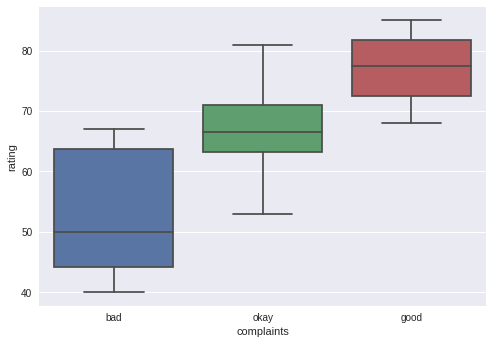

In [23]:
sb.boxplot(attitude['complaints'], attitude['rating'])

### 4.6 Bar Chart
Let's see the frequency of each complaint by using the bar chart. The first thing to do is to compute the amount of complaints for each category. This is done by using the `groupby` function to group the elements that are unique, and then apply the `count` function upon these individual groups. After that, we just call the `seaborn.barplot` function to plot the chart. This procedure is shown bellow.

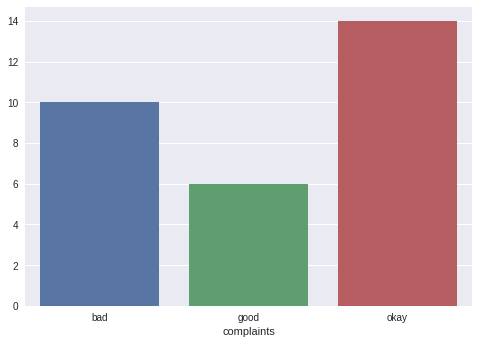

In [24]:
to_plot = attitude.groupby(by='complaints').count()['rating']
sb.barplot(to_plot.index, to_plot.values)

### 4.7 Modyfying Variable Names
To modify the names of the discrete variable `attitude['complaints']` it is necessary to replace the old values for the new categories. This can be done by calling the applying `lambda` expression on this column. The code for this procedure is shown bellow. As it's possible to see for the first 5 lines, the collumn `attitude['complaints']` contains the new categories.

In [25]:
attitude['complaints'] = attitude['complaints'].apply(lambda x : 'ruim' if x == 'bad' 
                                                      else 'normal' if x == 'okay' 
                                                      else 'bom')
attitude.head(5)

,rating,complaints,privileges,learning,raises,critical,advance
0,43,ruim,30,39,61,92,45
1,63,normal,51,54,63,73,47
2,71,normal,68,69,76,86,48
3,61,normal,45,47,54,84,35
4,81,normal,56,66,71,83,47


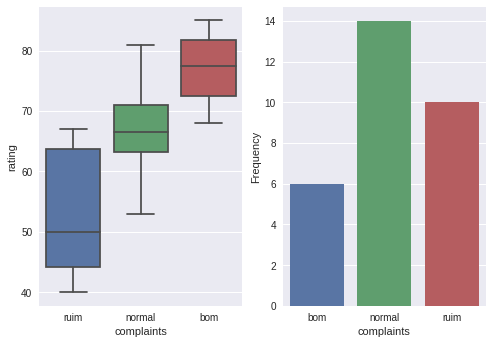

In [26]:
to_plot = attitude.groupby(by='complaints').count()['rating']
fig, axis = plt.subplots(nrows=1, ncols=2)
sb.boxplot(attitude['complaints'], attitude['rating'], ax=axis[0])
sb.barplot(to_plot.index, to_plot.values, ax=axis[1])
axis[1].set(ylabel='Frequency')